## Spatial Contiguity

Comparing changes in spatial contiguity using raw and cleaned Data, before and after application of`geoplanar`. For this notebook we will use the data files generated from level 1 administrated data. 
We will estimate both cases of Rook and Queen Contiguity on each set of data.

In [1]:
import geoplanar
import geopandas as gpd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import libpysal

### Data Retrieval

This notebook compares and contrast the US Canada data that was previously combined and cleaned in `geoplanar`. 

We read in the parquet files and rename them as raw for the raw data appended data from US/Canada that is not cleaned for planar enforcement violation. While the clean file contains the level 1 administrative boundaries that have been fixed using `geoplanar`.

In [3]:
raw = gpd.read_parquet("raw_us_candas.parquet")
raw.head()

,index,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,0,20.750,34.956,1.0,1.0,Washington,53,Pacific,WA,"MULTIPOLYGON (((-122.40075 48.22540, -122.4615...",...,None,None,None,None,None,None,None,None,None,None
1,1,45.132,34.527,2.0,2.0,Montana,30,Mtn,MT,"POLYGON ((-111.47463 44.70224, -111.48001 44.6...",...,None,None,None,None,None,None,None,None,None,None
2,2,9.571,18.899,3.0,3.0,Maine,23,N Eng,ME,"MULTIPOLYGON (((-69.77779 44.07407, -69.86044 ...",...,None,None,None,None,None,None,None,None,None,None
3,3,21.874,21.353,4.0,4.0,North Dakota,38,W N Cen,ND,"POLYGON ((-98.73006 45.93830, -99.00645 45.939...",...,None,None,None,None,None,None,None,None,None,None
4,4,22.598,22.746,5.0,5.0,South Dakota,46,W N Cen,SD,"POLYGON ((-102.78793 42.99532, -103.00541 42.9...",...,None,None,None,None,None,None,None,None,None,None


In [6]:
raw.shape

(61, 21)

In [7]:
clean = gpd.read_parquet("clean_1.parquet")
clean.head()

,index,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,0,20.750,34.956,1.0,1.0,Washington,53,Pacific,WA,"MULTIPOLYGON (((-122.45316 48.12867, -122.3600...",...,None,None,None,None,None,None,None,None,None,None
1,1,45.132,34.527,2.0,2.0,Montana,30,Mtn,MT,"POLYGON ((-111.45853 44.53800, -111.48178 44.5...",...,None,None,None,None,None,None,None,None,None,None
2,2,9.571,18.899,3.0,3.0,Maine,23,N Eng,ME,"MULTIPOLYGON (((-68.23925 44.43748, -68.16531 ...",...,None,None,None,None,None,None,None,None,None,None
3,3,21.874,21.353,4.0,4.0,North Dakota,38,W N Cen,ND,"POLYGON ((-99.00645 45.93958, -99.71695 45.942...",...,None,None,None,None,None,None,None,None,None,None
4,4,22.598,22.746,5.0,5.0,South Dakota,46,W N Cen,SD,"POLYGON ((-104.05899 43.85293, -104.05924 44.1...",...,None,None,None,None,None,None,None,None,None,None


In [8]:
clean.shape

(61, 21)

### Checking for Contiguity

A contiguous pair of spatial objects are those who share a common border. There can be different ways that objects can share a common border. 

We can check by using two types of contiguity/adjacency Rook and Queen. 

- **Rook Contiguity Case** (Requires pair of polygons to share an edge)

- **Queen Contiguity Case** (Requires pair of polygons only share one or more vertices)



In [9]:
import libpysal
from libpysal.weights import Queen, Rook
import pandas

### Rook contiguity

Here we will compare the rook contiguity of the raw and cleaned datatsets.

In [10]:
wr_raw = Rook.from_dataframe(raw)

In [11]:
wr_clean = Rook.from_dataframe(clean)

In [12]:
wr_raw.n

61

In [13]:
wr_clean.n

61

In [14]:
# non-zero entries
wr_raw.nonzero

242

In [15]:
wr_clean.nonzero

282

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

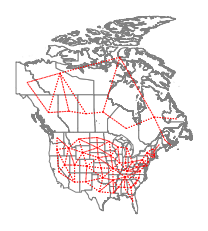

In [17]:
ax = raw.plot(edgecolor='grey', facecolor='w')
f,ax = wr_raw.plot(raw, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

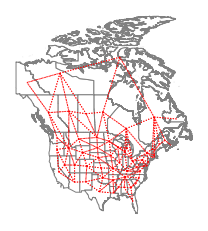

In [18]:
ax = clean.plot(edgecolor='grey', facecolor='w')
f,ax = wr_clean.plot(clean, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

In [19]:
# number of joins
wr_raw.s0

242.0

In [20]:
wr_clean.s0

282.0

In [21]:
# measure of the density of the spatial weights matrix
wr_raw.pct_nonzero

6.503628056973931

In [22]:
wr_clean.pct_nonzero

7.578607901101854

In [23]:
# # the first location in raw data has two neighbors at locations 10 and 7
wr_raw.neighbors[0] 

[10, 7]

In [27]:
raw['STATE_NAME'][[0, 10, 7]] # these are the names

0     Washington
10        Oregon
7          Idaho
Name: STATE_NAME, dtype: object

In [25]:
# the first location in clean data three neighbors at locations 49, 10 and 7

wr_clean.neighbors[0] 

[49, 10, 7]

In [28]:
raw['STATE_NAME'][[0,49, 10, 7]] # belongs to Canada

0     Washington
49          None
10        Oregon
7          Idaho
Name: STATE_NAME, dtype: object

Lets see who are the neighbors for each observation

In [29]:
# neighbors for each observation
wr_raw.neighbors

{0: [10, 7],
 1: [3, 4, 5, 7],
 2: [11],
 3: [1, 4, 9],
 4: [1, 3, 5, 9, 12, 14],
 5: [1, 4, 22, 7, 29, 14],
 6: [25, 12, 9, 47],
 7: [0, 1, 5, 22, 21, 10],
 8: [11, 13, 15],
 9: [3, 4, 12, 6],
 10: [0, 7, 21, 23],
 11: [8, 2, 13],
 12: [33, 4, 6, 9, 25, 14],
 13: [17, 18, 8, 11, 15],
 14: [33, 4, 5, 12, 29, 31],
 15: [16, 17, 19, 8, 13],
 16: [19, 24, 26, 27, 28, 15],
 17: [18, 13, 15],
 18: [17, 13],
 19: [16, 26, 15],
 20: [24, 25, 30, 47],
 21: [34, 7, 22, 23, 10],
 22: [34, 21, 5, 7, 29],
 23: [34, 10, 21],
 24: [16, 20, 27, 30, 47],
 25: [33, 20, 6, 12, 30],
 26: [16, 19, 28],
 27: [16, 32, 24, 28, 30],
 28: [16, 27, 32, 26],
 29: [35, 5, 22, 39, 14, 31],
 30: [32, 33, 20, 37, 24, 25, 27],
 31: [33, 35, 29, 14],
 32: [36, 37, 27, 28, 30],
 33: [35, 37, 44, 12, 14, 25, 30, 31],
 34: [39, 21, 22, 23],
 35: [33, 38, 39, 44, 29, 31],
 36: [32, 42, 43, 37],
 37: [32, 33, 36, 40, 41, 42, 44, 30],
 38: [35, 44, 45, 39],
 39: [34, 35, 29, 38],
 40: [41, 42, 37, 46],
 41: [40, 45, 44, 37]

In [30]:
# neighbors for each observation
wr_clean.neighbors

{0: [49, 10, 7],
 1: [48, 3, 4, 5, 7],
 2: [11, 58, 51],
 3: [48, 1, 50, 4, 9, 59],
 4: [1, 3, 5, 9, 12, 14],
 5: [1, 4, 22, 7, 29, 14],
 6: [20, 25, 12, 9, 47],
 7: [0, 1, 5, 10, 48, 49, 21, 22],
 8: [58, 11, 13, 15],
 9: [50, 3, 4, 20, 6, 56, 12],
 10: [0, 7, 21, 23],
 11: [8, 2, 58, 13],
 12: [33, 4, 6, 25, 9, 14],
 13: [17, 18, 8, 11, 15],
 14: [33, 4, 5, 12, 29, 31],
 15: [16, 17, 19, 8, 24, 56, 13],
 16: [19, 24, 26, 27, 28, 15],
 17: [18, 13, 15],
 18: [17, 13],
 19: [16, 26, 15],
 20: [6, 30, 24, 9, 56, 25, 47],
 21: [34, 7, 22, 23, 10],
 22: [34, 21, 5, 7, 29],
 23: [34, 10, 21],
 24: [16, 20, 56, 27, 15, 30, 47],
 25: [33, 20, 6, 12, 30],
 26: [16, 19, 28],
 27: [16, 32, 24, 28, 30],
 28: [16, 27, 32, 26],
 29: [35, 5, 22, 39, 14, 31],
 30: [32, 33, 20, 37, 24, 25, 27],
 31: [33, 35, 29, 14],
 32: [36, 37, 27, 28, 30],
 33: [35, 37, 44, 12, 14, 25, 30, 31],
 34: [39, 21, 22, 23],
 35: [33, 38, 39, 44, 29, 31],
 36: [32, 42, 43, 37],
 37: [32, 33, 36, 40, 41, 42, 44, 30],
 38:

In [31]:
# number of neighbors for each observation
wr_raw.cardinalities

{0: 2,
 1: 4,
 2: 1,
 3: 3,
 4: 6,
 5: 6,
 6: 4,
 7: 6,
 8: 3,
 9: 4,
 10: 4,
 11: 3,
 12: 6,
 13: 5,
 14: 6,
 15: 5,
 16: 6,
 17: 3,
 18: 2,
 19: 3,
 20: 4,
 21: 5,
 22: 5,
 23: 3,
 24: 5,
 25: 5,
 26: 3,
 27: 5,
 28: 4,
 29: 6,
 30: 7,
 31: 4,
 32: 5,
 33: 8,
 34: 4,
 35: 6,
 36: 4,
 37: 8,
 38: 4,
 39: 4,
 40: 4,
 41: 4,
 42: 5,
 43: 2,
 44: 6,
 45: 3,
 46: 2,
 47: 3,
 48: 3,
 49: 3,
 50: 3,
 51: 2,
 52: 1,
 53: 5,
 54: 1,
 55: 3,
 56: 2,
 57: 0,
 58: 4,
 59: 3,
 60: 2}

In [32]:
wr_clean.cardinalities

{0: 3,
 1: 5,
 2: 3,
 3: 6,
 4: 6,
 5: 6,
 6: 5,
 7: 8,
 8: 4,
 9: 7,
 10: 4,
 11: 4,
 12: 6,
 13: 5,
 14: 6,
 15: 7,
 16: 6,
 17: 3,
 18: 2,
 19: 3,
 20: 7,
 21: 5,
 22: 5,
 23: 3,
 24: 7,
 25: 5,
 26: 3,
 27: 5,
 28: 4,
 29: 6,
 30: 7,
 31: 4,
 32: 5,
 33: 8,
 34: 4,
 35: 6,
 36: 4,
 37: 8,
 38: 4,
 39: 4,
 40: 4,
 41: 4,
 42: 5,
 43: 2,
 44: 6,
 45: 3,
 46: 2,
 47: 4,
 48: 6,
 49: 5,
 50: 5,
 51: 3,
 52: 1,
 53: 5,
 54: 1,
 55: 3,
 56: 7,
 57: 0,
 58: 7,
 59: 4,
 60: 2}

In [33]:
# overview of the distribution of these cardinalities
wr_raw.histogram

[(0, 1), (1, 3), (2, 7), (3, 14), (4, 14), (5, 10), (6, 9), (7, 1), (8, 2)]

In [34]:
# overview of the distribution of these cardinalities
wr_clean.histogram

[(0, 1), (1, 2), (2, 4), (3, 9), (4, 13), (5, 12), (6, 10), (7, 7), (8, 3)]

The cardinalities and histogram attributes help quickly spot asymmetries in the number of neighbors

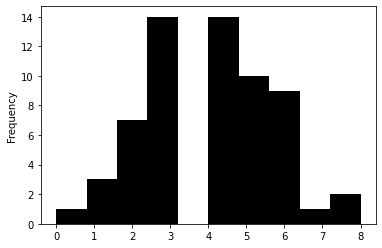

In [35]:
pandas.Series(wr_raw.cardinalities).plot.hist(color='k');

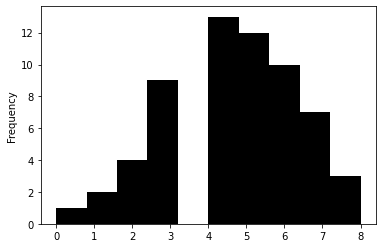

In [36]:
pandas.Series(wr_clean.cardinalities).plot.hist(color='k');

<AxesSubplot:ylabel='Frequency'>

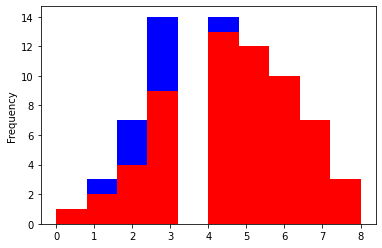

In [38]:

pandas.Series(wr_raw.cardinalities).plot.hist(color='b')
pandas.Series(wr_clean.cardinalities).plot.hist(color='r')


For the both data the maximum neighbors where 8. The distribution has changed as shown in the histograms above. 

### Queen contiguity

Now we apply the same steps to raw and clean data to test queen contiguity.

In [39]:
wq_raw = Queen.from_dataframe(raw)

In [40]:
wq_clean= Queen.from_dataframe(clean)

In [41]:
wq_raw.n

61

In [42]:
wq_clean.n

61

In [43]:
wq_raw.n == wr_raw.n # queen is same as rook in raw data

True

In [44]:
wq_clean.n == wr_clean.n # queen is same as rook in raw data

True

In [45]:
# non-zero entries
wq_raw.nonzero

252

In [46]:
# non-zero entries
wq_clean.nonzero

290

In [47]:
# number of joins
wq_raw.s0

252.0

In [48]:
# number of joins
wq_clean.s0

290.0

In [49]:
# measure of the density of the spatial weights matrix
wq_raw.pct_nonzero


6.772373018005912

In [50]:
# measure of the density of the spatial weights matrix
wq_clean.pct_nonzero

7.793603869927439

In [52]:
(wq_raw.pct_nonzero > wr_raw.pct_nonzero) == (wq_raw.n == wr_raw.n)

True

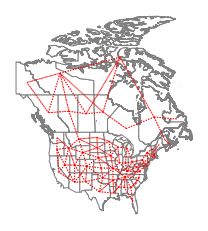

In [53]:
ax = raw.plot(edgecolor='grey', facecolor='w')
f,ax = wq_raw.plot(raw, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

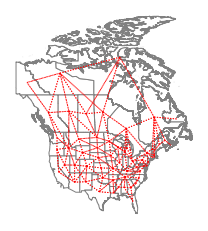

In [54]:
ax = clean.plot(edgecolor='grey', facecolor='w')
f,ax = wq_clean.plot(clean, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

In [55]:
# location 0 has the following neighbors
wq_raw.neighbors[0]

[10, 7]

In [56]:
wq_clean.neighbors[0]

[49, 10, 7]

In [57]:
# number of neighbors for each observation
wq_raw.cardinalities

{0: 2,
 1: 5,
 2: 1,
 3: 3,
 4: 6,
 5: 6,
 6: 4,
 7: 6,
 8: 3,
 9: 4,
 10: 4,
 11: 3,
 12: 6,
 13: 5,
 14: 6,
 15: 5,
 16: 6,
 17: 3,
 18: 2,
 19: 3,
 20: 4,
 21: 5,
 22: 6,
 23: 3,
 24: 5,
 25: 5,
 26: 3,
 27: 5,
 28: 4,
 29: 7,
 30: 7,
 31: 4,
 32: 5,
 33: 8,
 34: 5,
 35: 6,
 36: 4,
 37: 8,
 38: 4,
 39: 5,
 40: 4,
 41: 4,
 42: 5,
 43: 2,
 44: 6,
 45: 3,
 46: 2,
 47: 3,
 48: 4,
 49: 3,
 50: 4,
 51: 2,
 52: 1,
 53: 6,
 54: 1,
 55: 4,
 56: 2,
 57: 0,
 58: 4,
 59: 4,
 60: 2}

In [58]:
# number of neighbors for each observation
wq_clean.cardinalities

{0: 3,
 1: 5,
 2: 3,
 3: 6,
 4: 6,
 5: 6,
 6: 5,
 7: 8,
 8: 4,
 9: 7,
 10: 4,
 11: 4,
 12: 6,
 13: 5,
 14: 6,
 15: 7,
 16: 6,
 17: 3,
 18: 2,
 19: 3,
 20: 7,
 21: 5,
 22: 6,
 23: 3,
 24: 7,
 25: 5,
 26: 3,
 27: 5,
 28: 4,
 29: 7,
 30: 7,
 31: 4,
 32: 5,
 33: 8,
 34: 5,
 35: 6,
 36: 4,
 37: 8,
 38: 4,
 39: 5,
 40: 4,
 41: 4,
 42: 5,
 43: 2,
 44: 6,
 45: 3,
 46: 2,
 47: 4,
 48: 6,
 49: 5,
 50: 6,
 51: 3,
 52: 1,
 53: 6,
 54: 1,
 55: 4,
 56: 7,
 57: 0,
 58: 7,
 59: 5,
 60: 2}

In [59]:
# overview of the distribution of these cardinalities
wq_raw.histogram

[(0, 1), (1, 3), (2, 7), (3, 10), (4, 15), (5, 11), (6, 10), (7, 2), (8, 2)]

In [60]:
# overview of the distribution of these cardinalities
wq_clean.histogram

[(0, 1), (1, 2), (2, 4), (3, 8), (4, 11), (5, 12), (6, 12), (7, 8), (8, 3)]

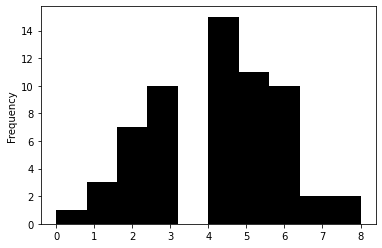

In [61]:
pandas.Series(wq_raw.cardinalities).plot.hist(color='k');

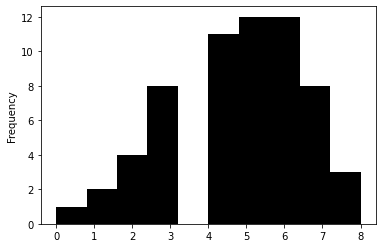

In [62]:
pandas.Series(wq_clean.cardinalities).plot.hist(color='k'); # clean data Queens neighbors

<AxesSubplot:ylabel='Frequency'>

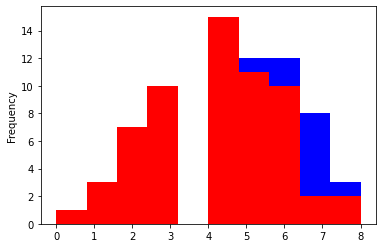

In [63]:
pandas.Series(wq_clean.cardinalities).plot.hist(color='b')
pandas.Series(wq_raw.cardinalities).plot.hist(color='r')
;# clean data Rooks neighbors

The blue bars represent the data after application of geoplanar and the red bars represent queen neighbors of the before we fixed the issues. 



In [69]:
c9 = [idx for idx,c in wq_raw.cardinalities.items() if c==9]

In [89]:
raw['STATE_NAME'][38]

'Texas'

In [90]:
wr_raw.neighbors[38]

[35, 44, 45, 39]

In [92]:
wq_clean.neighbors[38]

[35, 44, 45, 39]

(-120.0, -80.0, 25.0, 65.0)

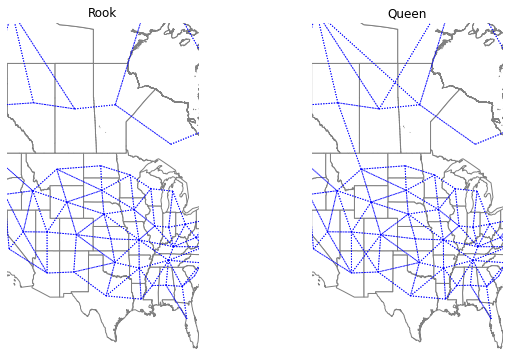

In [98]:
import numpy as np
f,ax = plt.subplots(1,2,figsize=(10, 6), subplot_kw=dict(aspect='equal'))
raw.plot(edgecolor='grey', facecolor='w', ax=ax[0])
wr_raw.plot(raw, ax=ax[0],
        edge_kws=dict(color='b', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[0].set_title('Rook')
ax[0].axis(np.asarray([-120, -80, 25, 65]))

ax[0].axis('off')
raw.plot(edgecolor='grey', facecolor='w', ax=ax[1])
wq_raw.plot(raw, ax=ax[1],
        edge_kws=dict(color='b', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[1].set_title('Queen')
ax[1].axis('off')
ax[1].axis(np.asarray([-120, -80, 25, 65]))

(-120.0, -80.0, 25.0, 65.0)

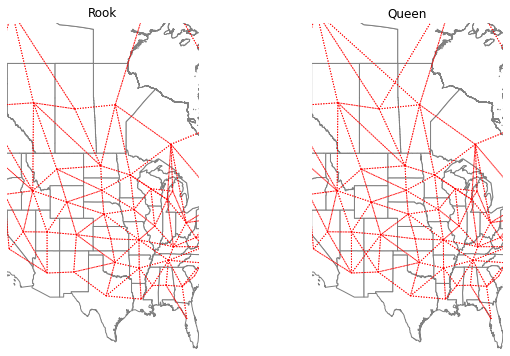

In [99]:
import numpy as np
f,ax = plt.subplots(1,2,figsize=(10, 6), subplot_kw=dict(aspect='equal'))
clean.plot(edgecolor='grey', facecolor='w', ax=ax[0])
wr_clean.plot(clean, ax=ax[0],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[0].set_title('Rook')
ax[0].axis(np.asarray([-120, -80, 25, 65]))

ax[0].axis('off')
clean.plot(edgecolor='grey', facecolor='w', ax=ax[1])
wq_clean.plot(clean, ax=ax[1],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[1].set_title('Queen')
ax[1].axis('off')
ax[1].axis(np.asarray([-120, -80, 25, 65]))

(-140.0, -70.0, 25.0, 70.0)

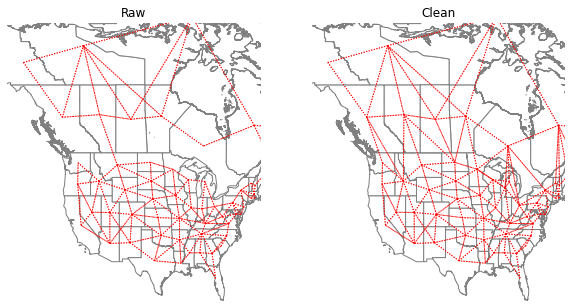

In [103]:
import numpy as np
f,ax = plt.subplots(1,2,figsize=(10, 6), subplot_kw=dict(aspect='equal'))
raw.plot(edgecolor='grey', facecolor='w', ax=ax[0])
wq_raw.plot(raw, ax=ax[0],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[0].set_title('Raw')
ax[0].axis(np.asarray([-140, -70, 25, 70]))

ax[0].axis('off')
clean.plot(edgecolor='grey', facecolor='w', ax=ax[1])
wq_clean.plot(clean, ax=ax[1],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[1].set_title('Clean')
ax[1].axis('off')
ax[1].axis(np.asarray([-140, -70, 25, 70]))

These maps show Queen Contiguity for both clean and raw Data.